In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:
df = pd.read_csv('/content/drive/MyDrive/work/OnlineNewsPopularity.csv')
#removing extra spaces from column names
new_names = ['url']
for i in range(1, len(df.columns)):
    new_names.append(df.columns[i][1:])
df.columns = new_names
plt_df = pd.read_csv('/content/drive/MyDrive/work/OnlineNewsPopularity.csv')

In [ ]:
df = df[df.timedelta >= 14]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


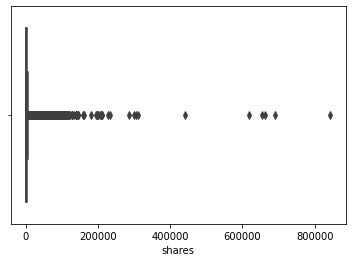

In [88]:
sb.boxplot(df['shares'])

In [ ]:
x = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [ ]:
q1 = np.quantile(y, 0.25)
q3 = np.quantile(y, 0.75)
med = np.median(y)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

1856.0 5584.0 -1840.0


In [ ]:
df['shares'].loc[df['shares'] > upper_bound] = upper_bound #removing outliers

In [ ]:
sb.boxplot(df[' shares'])

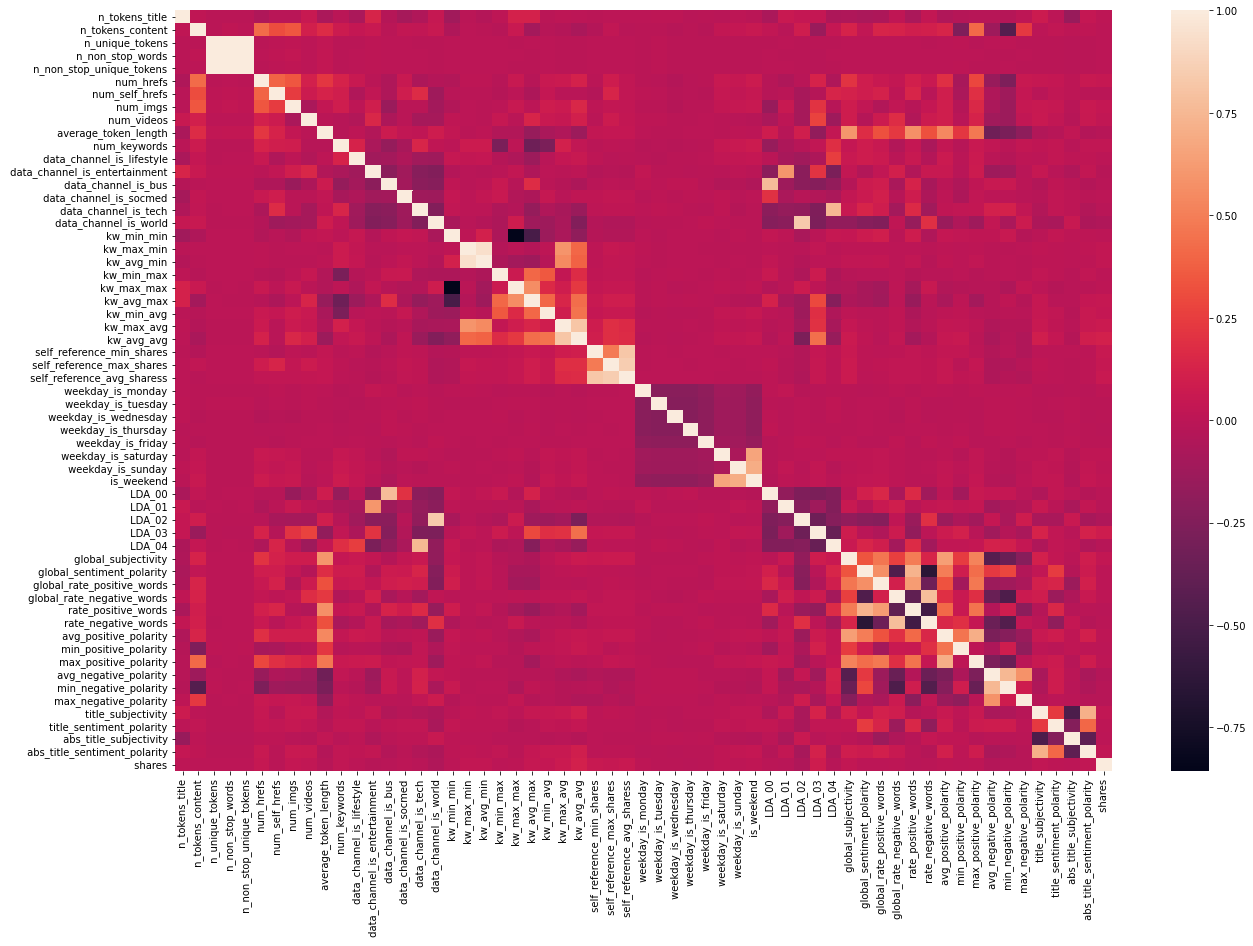

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,14))
sb.heatmap(plt_df.iloc[:, 2:].corr(),xticklabels = True, yticklabels = True)

In [ ]:
df.drop(['n_non_stop_unique_tokens', 'n_non_stop_words','kw_max_min', 'kw_max_max'],axis = 1, inplace = True)

In [ ]:
x = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [ ]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39426,http://mashable.com/2014/12/22/window-washer-f...,14.0,11.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.000000,0.000,0.000000,0.450000,0.050000,0.050000,0.050000,2300
39427,http://mashable.com/2014/12/22/winter-solstice...,14.0,11.0,820.0,0.497512,12.0,8.0,3.0,1.0,4.781707,...,0.062500,0.8,-0.220380,-1.000,-0.050000,0.000000,-0.200000,0.500000,0.200000,1200
39428,http://mashable.com/2014/12/23/18-tv-shows-to-...,14.0,11.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.000000,0.000,0.000000,0.600000,-0.200000,0.100000,0.200000,1200
39429,http://mashable.com/2014/12/23/acing-job-inter...,14.0,9.0,952.0,0.442797,14.0,0.0,1.0,1.0,4.694328,...,0.033333,1.0,-0.381661,-1.000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,...,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000
mean,356.388654,10.394081,546.577109,0.548610,10.884634,3.296772,4.551596,1.252263,4.549803,7.224975,...,0.095498,0.757221,-0.259567,-0.521908,-0.107581,0.282399,0.071489,0.341947,0.156041,2120.204839
std,213.239790,2.111761,471.382950,3.530177,11.329065,3.857575,8.324116,4.110389,0.839479,1.910031,...,0.071368,0.247362,0.127666,0.290166,0.095450,0.324351,0.265387,0.188727,0.226256,1623.012422
min,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,168.000000,9.000000,246.000000,0.470968,4.000000,1.000000,1.000000,0.000000,4.478405,6.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,944.000000
50%,342.000000,10.000000,409.000000,0.539326,8.000000,3.000000,1.000000,0.000000,4.663717,7.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,716.000000,0.608838,14.000000,4.000000,4.000000,1.000000,4.854584,9.000000,...,0.100000,1.000000,-0.187007,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,5584.000000


In [ ]:
df.isnull().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday  

In [ ]:
url_list = plt_df.iloc[:, 0]              #dividing them into slices for easier plotting
features = plt_df.iloc[:, 2:-1]
labels = plt_df.iloc[:,-1]

In [ ]:
for i in range(len(labels)):          #converting into a classification of 3 groups
  if labels.iloc[i] <=700:
    labels.at[i] = "poor"
  elif labels.iloc[i] <= 2800:
    labels.at[i] = "good"
  else:
    labels.at[i] = "amazing"

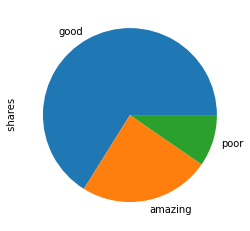

In [ ]:
labels.value_counts().plot(kind='pie')

In [ ]:
"""plt.figure(figsize=(21,14))                                       #boxplots for the first 4 features
plt.subplot(221)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 2], y = plt_df.iloc[:, -1])
plt.subplot(222)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 3], y = plt_df.iloc[:, -1])
plt.subplot(223)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 4], y = plt_df.iloc[:, -1])
plt.subplot(224)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 5], y = plt_df.iloc[:, -1])"""

**EDA**

* There are no null values present in the data.
* We have a highly inbalanced data, as we can infer from the boxplots.
* There are 39644 rows and 61 columns, out of the said columns, there are 58 predictive columns, 2 non predictive columns and 1 goal field.
* After converting the values of shares into classes we can see that they are severely spread out on one side, i.e., we have a lot of outliers.
* From the heatmap we can see that the features do not co-relate to each other much, with most of the pairs having a correlation value around 0.


In [ ]:
def normalize(arr):
	for i in range(0,np.shape(arr)[1]):
		if (np.std(arr[:,i])!=0): #because of the column of ones
			arr[:,i] = ((arr[:,i] - np.mean(arr[:,i]))/np.std(arr[:, i]))
def normalize_y(arr):
	for i in range(0,np.shape(arr)[1]-1):
		if (np.std(arr[:,i])!=0): #because of the column of ones
			arr[:,i] = ((arr[:,i] - np.mean(arr[:,i]))/np.std(arr[:, i]))

In [ ]:
str_arr = np.array(df.iloc[:,0])
shares_arr = np.array(df.iloc[:,-1])
import re
for i in range(len(str_arr)):
    str_arr[i] = re.sub(r'https?\:\/\/mashable.com\/[0-9]+\/[0-9]+\/[0-9]+\/',r'',str_arr[i])
    str_arr[i] = re.sub(r'\-', r' ', str_arr[i])
    str_arr[i] = re.sub(r'(\s|^)[0-9]+($|\s)', r' ', str_arr[i])
    str_arr[i] = str_arr[i][:-1]

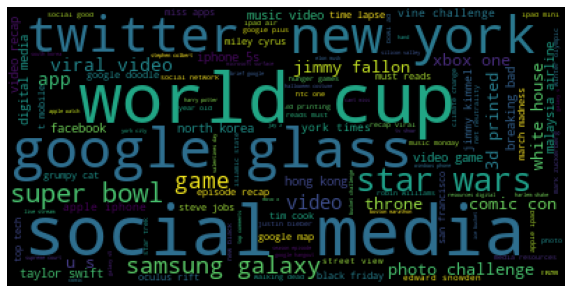

In [ ]:
token_titles=[]
import math
for i in range(len(str_arr)):
    arr_t = str_arr[i].split(' ')
    for j in range(int(math.log(shares_arr[i]))):
        token_titles.append(arr_t)
flattened_list = []
for  i in range(len(token_titles)):
  for j in token_titles[i]:
    flattened_list.append(j)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def gen_wc(word_arr):
    wordcloud = WordCloud(max_font_size=50, scale=1).generate(" ".join(word_arr))
    fig = plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
gen_wc(flattened_list)

Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg1 = LinearRegression()
reg1.fit(x_train, y_train)
pred = (reg1.predict(x_test))
print(reg1.score(x_test, y_test))

0.10505388106564206


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
reg2 = GridSearchCV(Lasso(), {'alpha':np.linspace(0.1,0.5,10)})
reg2.fit(x_train, y_train)
print(reg2.score(x_train, y_train))
y_pred = reg2.predict(x_train)
print(mean_squared_error(y_train, y_pred, squared = False))
reg3 = GridSearchCV(Ridge(), {'alpha':np.linspace(0,200,11)})
reg3.fit(x_train, y_train)
print(reg3.score(x_test, y_test))
y_pred = reg3.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared = False))

0.12103148561041133
1518.8247486956343
0.10435746099003973
1547.1305777392347


In [ ]:
reg3.best_params_

{'alpha': 180.0}

Classification

In [ ]:
#d_arr = np.array(df.iloc[:,1:])
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(d_arr)
#d_arr = transformer.transform(d_arr)
#normalize(d_arr)
#x = d_arr[:,:-1]
#y = d_arr[:,-1]
for i in range(np.shape(y)[0]):
    if (y[i]<1400):
        y[i] = 0
    else:
        y[i] = 1

In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest,chi2
skb = SelectKBest(k=30)
x_new = skb.fit_transform(x, y)
print(skb.get_feature_names_out(df.columns[2:-1]))

['n_tokens_title' 'num_hrefs' 'num_keywords'
 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'data_channel_is_world' 'kw_min_min' 'kw_avg_min'
 'kw_min_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'weekday_is_tuesday' 'weekday_is_wednesday' 'weekday_is_thursday'
 'weekday_is_saturday' 'is_weekend' 'LDA_00' 'LDA_01' 'LDA_02' 'LDA_03'
 'LDA_04' 'global_subjectivity' 'global_sentiment_polarity'
 'global_rate_positive_words' 'rate_positive_words' 'rate_negative_words'
 'max_positive_polarity']


Classification

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred1 = clf.predict_proba(x_test)
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr1, tpr1, _ = roc_curve(y_test, y_pred1[:,1])

0.5699251933561557
0.8138755980861244
0.5654920212765957
0.6673205178501374


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)
y_pred1 = clf1.predict_proba(x_test)
y_pred = clf1.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr2, tpr2, _ = roc_curve(y_test, y_pred1[:,1])

0.5122353239508052
0.1437799043062201
0.6915995397008056
0.23806694394929687


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 25,criterion = 'entropy')
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)
y_pred1 = clf2.predict_proba(x_test)
y_pred = clf2.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr3, tpr3, _ = roc_curve(y_test, y_pred1[:,1])

0.6563966020032965
0.7040669856459331
0.6664402173913043
0.6847370870172172


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf3 = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy')
clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)
y_pred1 = clf3.predict_proba(x_test)
y_pred = clf3.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr4, tpr4, _ = roc_curve(y_test, y_pred1[:,1])

0.6589208724321582
0.7159063910667617
0.6685340285096234
0.691409723218127


In [ ]:
# TODO grid search on kernel, max_iter, C
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# clf3 = SVC(C=1.1, kernel='linear', max_iter=200)
# clf3.fit(x_train, y_train)
# clf3.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.47773994198511793

In [ ]:
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# y_pred = clf2.predict(x_test)
# print(precision_score(y_pred,y_test))

0.7141502725764399


ANN Training

Grid Search for ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
x_ann_train, x_ann_test, y_ann_train, y_ann_test = train_test_split(x,y, test_size= 0.2, random_state = 1)

In [ ]:
model = MLPClassifier( hidden_layer_sizes= (40, 32, 20, 12, 8), learning_rate_init = 0.001) 

parameters = { 'activation' : ['relu', 'logistic', 'identity', 'tanh'],}

gscv_model = GridSearchCV(model, parameters, n_jobs = -1, cv = 5)

gscv_model.fit(x_ann_train, y_ann_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(40, 32, 20, 12, 8)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'identity',
                                        'tanh']})

In [ ]:
gscv_model.best_params_

{'activation': 'identity'}

In [ ]:
gscv_model.best_score_

0.537122285975496

In [ ]:
ann_clf = MLPClassifier( hidden_layer_sizes= (40, 32, 20, 12, 8), activation = 'identity',  learning_rate_init = 0.001)

In [ ]:
y_pred1 = ann_clf.predict_proba(x_test)
y_pred = ann_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr5, tpr5, _ = roc_curve(y_test, y_pred1[:,1])

In [ ]:
from sklearn.metrics import log_loss
num_epochs = 200
val_losses = []
train_losses = []
icount =1
act_fns = ['identity']
for a in act_fns:
    clf_pf = MLPClassifier(hidden_layer_sizes=(40,32,20,12,8), activation = a, max_iter = 25)
    val_losses_pf = []
    train_losses_pf = []
    for i in range(num_epochs):
        clf_pf.partial_fit(x_train, y_train, np.unique(y_train))
        pred = clf_pf.predict_proba(x_test)
        val_losses_pf.append(log_loss(y_test, pred, labels = [0,1]))
        train_losses_pf.append(log_loss(y_train, clf_pf.predict_proba(x_train), labels = [0,1]))
    plt.plot(val_losses_pf)
    plt.plot(train_losses_pf)
    plt.title('activation function = '+str(a))
    plt.ylabel('log_loss')
    plt.xlabel('epochs')
    plt.savefig('image'+str(icount)+'.png')
    icount+=1
    plt.clf()
    

<Figure size 432x288 with 0 Axes>

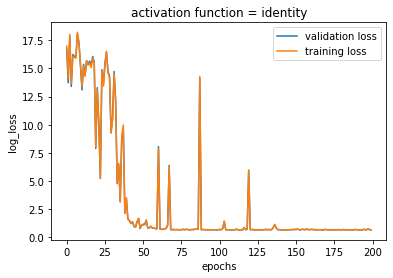

In [ ]:
plt.plot(val_losses_pf, label = "validation loss")
plt.plot(train_losses_pf, label = "training loss")
plt.title('activation function = '+str(a))
plt.ylabel('log_loss')
plt.xlabel('epochs')
plt.legend(loc = "upper right")
plt.savefig('image'+str(icount)+'.png')


In [ ]:
gscv_model.score(x_test, y_test)
y_pred1 = gscv_model.predict_proba(x_test)
y_pred = gscv_model.predict(x_train)
print(accuracy_score(y_pred,y_train))
print(precision_score(y_pred,y_train))
print(recall_score(y_pred,y_train))
print(f1_score(y_pred,y_train))
fpr5, tpr5, _ = roc_curve(y_test, y_pred1[:,1])

0.5222863302054274
0.9511760513186029
0.5291959948448498
0.6800433148608191


SVM Training

In [ ]:
from sklearn.svm import SVC

In [ ]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
s_model = SVC(probability = True, max_iter = 300)

parameters = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1, 0.1, 10, 0.05]
}

gscv_s_model = GridSearchCV(s_model, parameters, n_jobs = -1, cv = 3)

gscv_s_model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(max_iter=300, probability=True), n_jobs=-1,
             param_grid={'C': [1, 0.1, 10, 0.05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
gscv_s_model.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [ ]:
gscv_s_model.score(x_test, y_test)
y_pred1 = gscv_s_model.predict_proba(x_test)
y_pred = gscv_s_model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr6, tpr6, _ = roc_curve(y_test, y_pred1[:,1])

0.5297324711550653
0.9995215311004785
0.5298668357641091
0.6925818483215914


In [ ]:
gscv_model.best_score_

0.537122285975496

In [ ]:
svm_clf=SVC(kernel="poly", max_iter = 1000, C = 0.1, probability = True)
svm_clf.fit(x_train, y_train)
y_pred1 = svm_clf.predict_proba(x_test)
y_pred = svm_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
fpr6, tpr6, _ = roc_curve(y_test, y_pred1[:,1])

In [ ]:
svm_clf.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
gscv_s_model.score(x_test, y_test)

0.5297324711550653

Text(0.5, 1.0, 'ROC Curves')

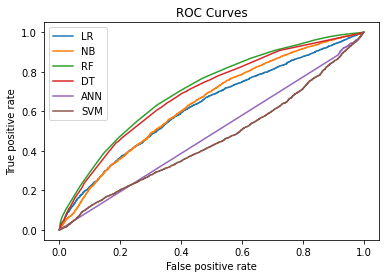

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label = "LR")
plt.plot(fpr2, tpr2, label = "NB")
plt.plot(fpr3, tpr3, label = "RF")
plt.plot(fpr4, tpr4, label = "DT")
plt.plot(fpr5, tpr5, label = "ANN")
plt.plot(fpr6, tpr6, label = "SVM")
plt.gca().legend(('LR','NB','RF','DT','ANN','SVM'))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curves')

In [84]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(x_train, y_train) 
y_pred1 = clf_knn.predict_proba(x_test)
y_pred = clf_knn.predict(x_train)
print(accuracy_score(y_pred,y_train))
print(precision_score(y_pred,y_train))
print(recall_score(y_pred,y_train))
print(f1_score(y_pred,y_train))
fpr6, tpr6, _ = roc_curve(y_test, y_pred1[:,1])

0.7681334009637332
0.5655737704918032
1.0
0.7225130890052355
